# PML-CAP10-Gaussian Naive Bayes - Cancer

### Read CSV

In [19]:
import pandas as pd
df=pd.read_csv("csv/cancer.csv")
df.head(9)

,ID_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


### Count Types

In [2]:
count_types=df['diagnosis'].value_counts()
display(count_types)

B    357
M    212
Name: diagnosis, dtype: int64

In [3]:
#display(df.columns)
#df.groupby('diagnosis').hist(figsize=(20, 20))

### Split Data

In [43]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
dfX=df[['fractal_dimension_se','perimeter_mean','smoothness_worst','symmetry_worst','radius_worst']]
X=dfX.values
Y=df['diagnosis'].values
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=1234)

### Plot train values

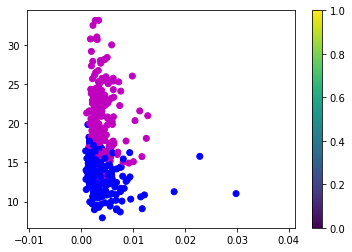

In [44]:
import matplotlib.pyplot as plt
plt.scatter(train_x[:,0],train_x[:,4],c=train_y,cmap='viridis')
plt.colorbar()
plt.show()

### Train Model

In [45]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predict Model

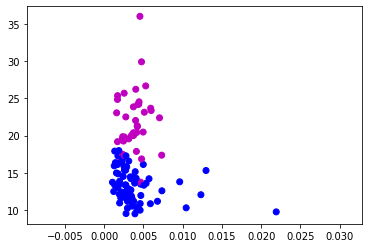

In [46]:
pred_EY = model.predict(test_x)
plt.scatter(test_x[:,0],test_x[:,4],c=pred_EY,cmap='viridis')
plt.show()

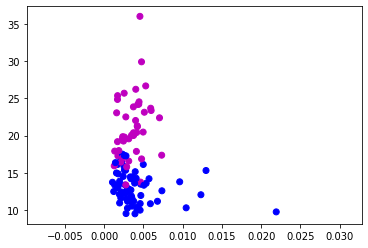

In [47]:
plt.scatter(test_x[:,0],test_x[:,4],c=test_y,cmap='viridis')
plt.show()

### Metrics

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
mconf=confusion_matrix(test_y,pred_EY)
display(mconf)
print(classification_report(test_y,pred_EY))

array([[66,  3],
       [ 9, 36]], dtype=int64)

              precision    recall  f1-score   support

           B       0.88      0.96      0.92        69
           M       0.92      0.80      0.86        45

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



### Examples

In [49]:
df_benign = df[df['diagnosis']=='B'].tail(10)[['fractal_dimension_se','perimeter_mean','smoothness_worst','symmetry_worst','radius_worst']]
pred_benign = model.predict(df_benign)
print(pred_benign)
df_malign = df[df['diagnosis']=='M'].head(10)[['fractal_dimension_se','perimeter_mean','smoothness_worst','symmetry_worst','radius_worst']]
pred_malign = model.predict(df_malign)
print(pred_malign)

['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
